# APPROACH 1

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import nltk 
import numpy as np
import re
from nltk.stem import wordnet # to perform lemmitization
from sklearn.feature_extraction.text import CountVectorizer # to perform bow
from sklearn.feature_extraction.text import TfidfVectorizer # to perform tfidf
from nltk import pos_tag # for parts of speech
from sklearn.metrics import pairwise_distances # to perfrom cosine similarity
from nltk import word_tokenize # to create tokens
from nltk.corpus import stopwords # for stop words
import warnings
warnings.filterwarnings("ignore")

# IMPORT DATASET

In [2]:
df=pd.read_csv('C:/Users/ASUS/Desktop/Project 2/Email_Template.csv')

In [3]:
#copy dataset in another variable for APPROCH 2
import copy
TEMP = copy.deepcopy(df)
TEMP.drop(columns={'Unnamed: 0','Template type'},axis=1,inplace=True)# droping columns
TEMP.ffill(axis = 0,inplace=True) # fills the null value with the previous value.
TEMP.head()

Categories                                            Subject  \
0  Cold Email Templates                    {Company Name} + {Your Company}   
1  Cold Email Templates                        {Company Name} + Smart Host   
2  Cold Email Templates  How to Export [company] Prospects from profess...   
3  Cold Email Templates  How to Export [company] Prospects from profess...   
4  Cold Email Templates  How to Export [company] Prospects from profess...   

                                             Context  
0  Hi {name}, My name is {name} with {Your Compan...  
1  Hi Mike, My name is Nick and I’m a co-founder ...  
2  {name}, I'd like to discuss your lead gen effo...  
3  Hi {name}, {myName} from {myCompany} here. Com...  
4  Hi {name}, I’m trying to figure out who is in ...

In [4]:
df.drop(columns={'Unnamed: 0','Template type','Subject'},axis=1,inplace=True)# droping columns
df.ffill(axis = 0,inplace=True) # fills the null value with the previous value.
df.head()

Categories                                            Context
0  Cold Email Templates  Hi {name}, My name is {name} with {Your Compan...
1  Cold Email Templates  Hi Mike, My name is Nick and I’m a co-founder ...
2  Cold Email Templates  {name}, I'd like to discuss your lead gen effo...
3  Cold Email Templates  Hi {name}, {myName} from {myCompany} here. Com...
4  Cold Email Templates  Hi {name}, I’m trying to figure out who is in ...

In [5]:
df.describe()

Categories  \
count                    103   
unique                    16   
top     Cold Email Templates   
freq                      22   

                                                  Context  
count                                                 103  
unique                                                103  
top     Hi Eric, I understand you are the CEO at Singl...  
freq                                                    1

# SAMPLE VISUALIZATION OF MAILS

In [6]:
# function that converts text into lower case and removes special characters

def step1(x):
    for i in x:
        a=str(i).lower()
        p=re.sub(r'[^a-z0-9]',' ',a)
        print(p)

In [7]:
step1(df['Context'])

hi  name   my name is  name  with  your company  we help  specific company type  with  one liner   i wanted to learn how you handle thing your company handles  at  company name  and show you what we re working on are you available for a brief call at  time options  
hi mike  my name is nick and i m a co founder at smart host  we help property managers optimize their pricing on marketplaces like homeaway  vrbo  and flipkey  i wanted to learn how you currently handle price optimization and show you what we re working on  are you available for a quick call tomorrow afternoon 
 name   i d like to discuss your lead gen efforts  we re helping other  industry  companies collect their prospects straight from professional social networks and import them directly into their crm  adding phone numbers and email addresses   quick question  can you put me in touch with whoever is responsible for new prospecting and revenue  generating tools at  company  
hi  name    myname  from  mycompany  here  co

# CLEANING THE MAILS

In [8]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [9]:
df['Context'] = df.Context.apply(clean)
df.Context

0      hi name my name is name with your companywe he...
1      hi mike my name is nick and im a cofounder at ...
2      name id like to discuss your lead gen efforts ...
3      hi name myname from mycompany here companies m...
4      hi name im trying to figure out who is in char...
                             ...                        
98     hello name thank you for your interest in repl...
99     hi  name i read your fantastic blog post about...
100    hi name your websites design is absolutely bri...
101    hello  name in working with other industry one...
102    hi name what would it mean to your topline rev...
Name: Context, Length: 103, dtype: object

# COUNT VECTORIZER

In [10]:
#Counting tokens 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(df['Context'])
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df.head()

word  count
0    to    306
1   you    257
2   the    185
3   and    166
4  your    140

In [11]:
import nltk
# !pip install nltk
# nltk.download('punkt')

In [12]:
# removing punctuation marks 
text = ' '.join(df['Context'])
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
from nltk.probability import FreqDist
fdist = FreqDist(text_tokens)
print(fdist)

<FreqDist with 1611 samples and 7817 outcomes>


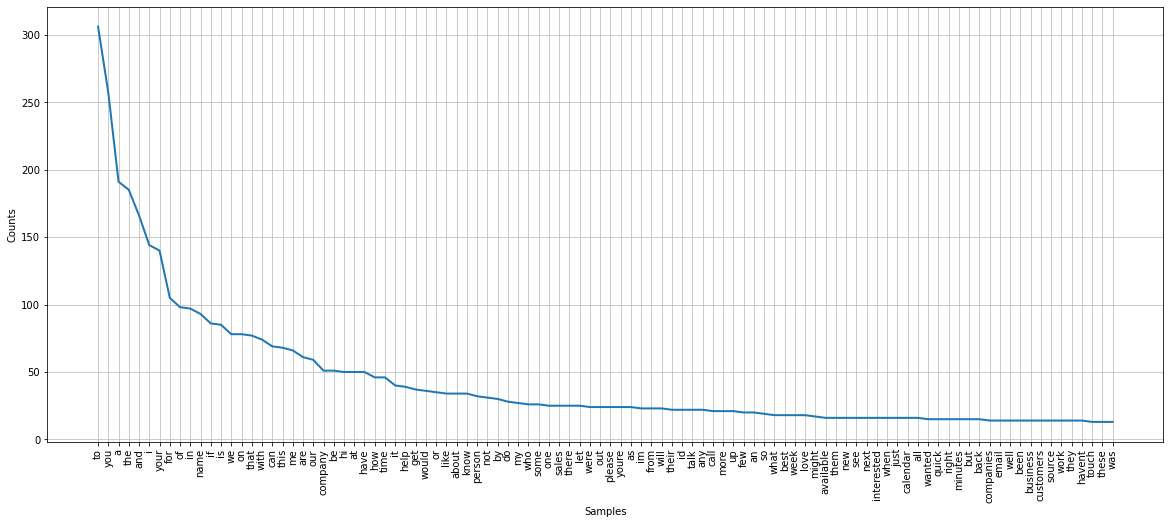

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))

fdist.plot(100,cumulative=False)
plt.show()

<AxesSubplot:title={'center':'Stopwords in mails'}, xlabel='word'>

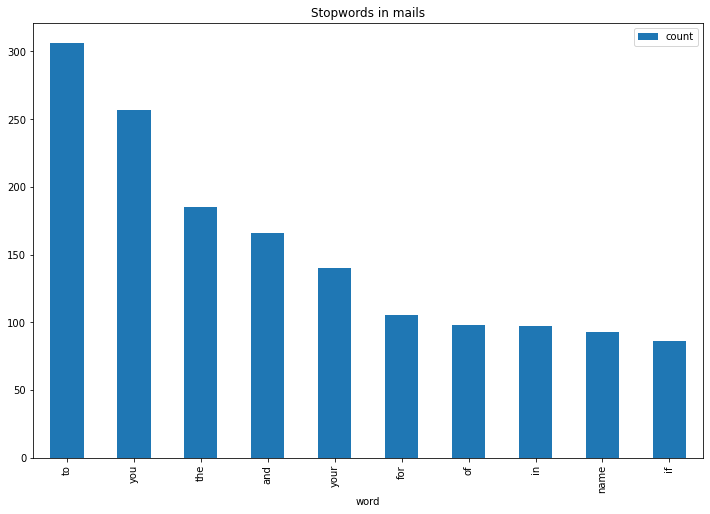

In [14]:
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Stopwords in mails')

# STOPWORDS

In [15]:
# all the stop words we have 
stop = stopwords.words('english')
new_words=('to','you', 'the', 'and','your','for','of','in','name','if')
for i in new_words: 
    stop.append(i)
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
df['Context_without_stopwords'] = df['Context'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

Categories                                            Context  \
0  Cold Email Templates  hi name my name is name with your companywe he...   
1  Cold Email Templates  hi mike my name is nick and im a cofounder at ...   
2  Cold Email Templates  name id like to discuss your lead gen efforts ...   
3  Cold Email Templates  hi name myname from mycompany here companies m...   
4  Cold Email Templates  hi name im trying to figure out who is in char...   

                           Context_without_stopwords  
0  hi companywe help specific company type one li...  
1  hi mike nick im cofounder smart host help prop...  
2  id like discuss lead gen efforts helping compa...  
3  hi myname mycompany companies make sales consi...  
4  hi im trying figure charge company would mind ...

In [17]:
book = [x.strip() for x in df.Context] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False

# LEMMATIZATION TEXT

In [18]:
# function that performs text normalization steps

def text_normalization(text):
    text=str(text).lower() # text to lower case
    spl_char_text=re.sub(r'[^ a-z]','',text) # removing special characters
    tokens=nltk.word_tokenize(spl_char_text) # word tokenizing
    lema=wordnet.WordNetLemmatizer() # intializing lemmatization
    tags_list=pos_tag(tokens,tagset=None) # parts of speech
    lema_words=[]   # empty list 
    for token,pos_token in tags_list:
        if pos_token.startswith('V'):  # Verb
            pos_val='v'
        elif pos_token.startswith('J'): # Adjective
            pos_val='a'
        elif pos_token.startswith('R'): # Adverb
            pos_val='r'
        else:
            pos_val='n' # Noun
        lema_token=lema.lemmatize(token,pos_val) # performing lemmatization
        lema_words.append(lema_token) # appending the lemmatized token into a list
    
    return " ".join(lema_words) # returns the lemmatized tokens as a sentence

In [19]:
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

In [20]:
df['lemmatized_text']=df['Context_without_stopwords'].apply(text_normalization) # applying the fuction to the dataset to get clean text
df.head()

Categories                                            Context  \
0  Cold Email Templates  hi name my name is name with your companywe he...   
1  Cold Email Templates  hi mike my name is nick and im a cofounder at ...   
2  Cold Email Templates  name id like to discuss your lead gen efforts ...   
3  Cold Email Templates  hi name myname from mycompany here companies m...   
4  Cold Email Templates  hi name im trying to figure out who is in char...   

                           Context_without_stopwords  \
0  hi companywe help specific company type one li...   
1  hi mike nick im cofounder smart host help prop...   
2  id like discuss lead gen efforts helping compa...   
3  hi myname mycompany companies make sales consi...   
4  hi im trying figure charge company would mind ...   

                                     lemmatized_text  
0  hi companywe help specific company type one li...  
1  hi mike nick im cofounder smart host help prop...  
2  id like discuss lead gen effort help company c...  
3  hi myname mycompany company make sale consiste...  
4  hi im try figure charge company would mind poi...

In [21]:
# COUNT OF WORDS AFTER LEMMATIZATION

In [22]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X1 = cv.fit_transform(df['lemmatized_text'])
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df1 = pd.DataFrame(words_freq)
wf_df1.columns = ['word', 'count']

wf_df1

word  count
0       approach    166
1     incredibly    105
2           saas     98
3           mean     97
4        reduces     93
...          ...    ...
1255      though      1
1256     mistake      1
1257  relatively      1
1258      simple      1
1259    numerous      1

[1260 rows x 2 columns]

<AxesSubplot:title={'center':'lemmatized text'}, xlabel='word'>

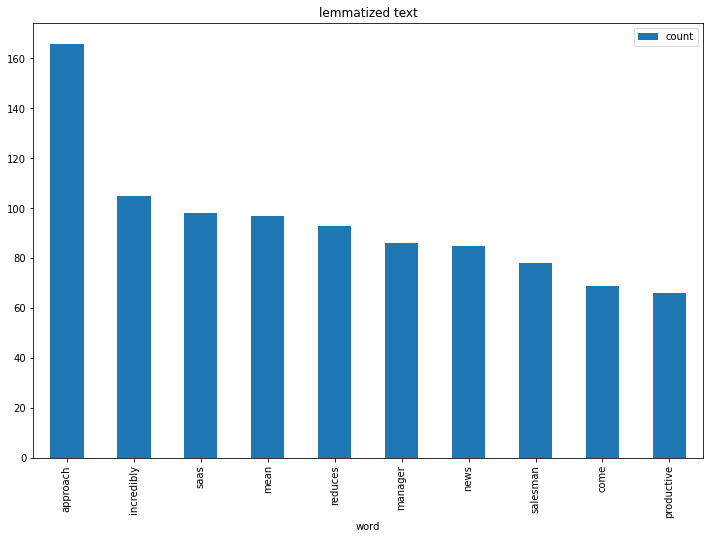

In [23]:
wf_df1[0:10].plot.bar(x='word', figsize=(12,8), title='lemmatized text')

In [24]:
# FREQUENCY OF WORDS AFTER LEMMATIZATION

In [25]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(df['lemmatized_text']).split()).value_counts()[:5] # for top 5
freq_Sw

company    68
time       55
get        50
hi         50
help       48
dtype: int64

In [26]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

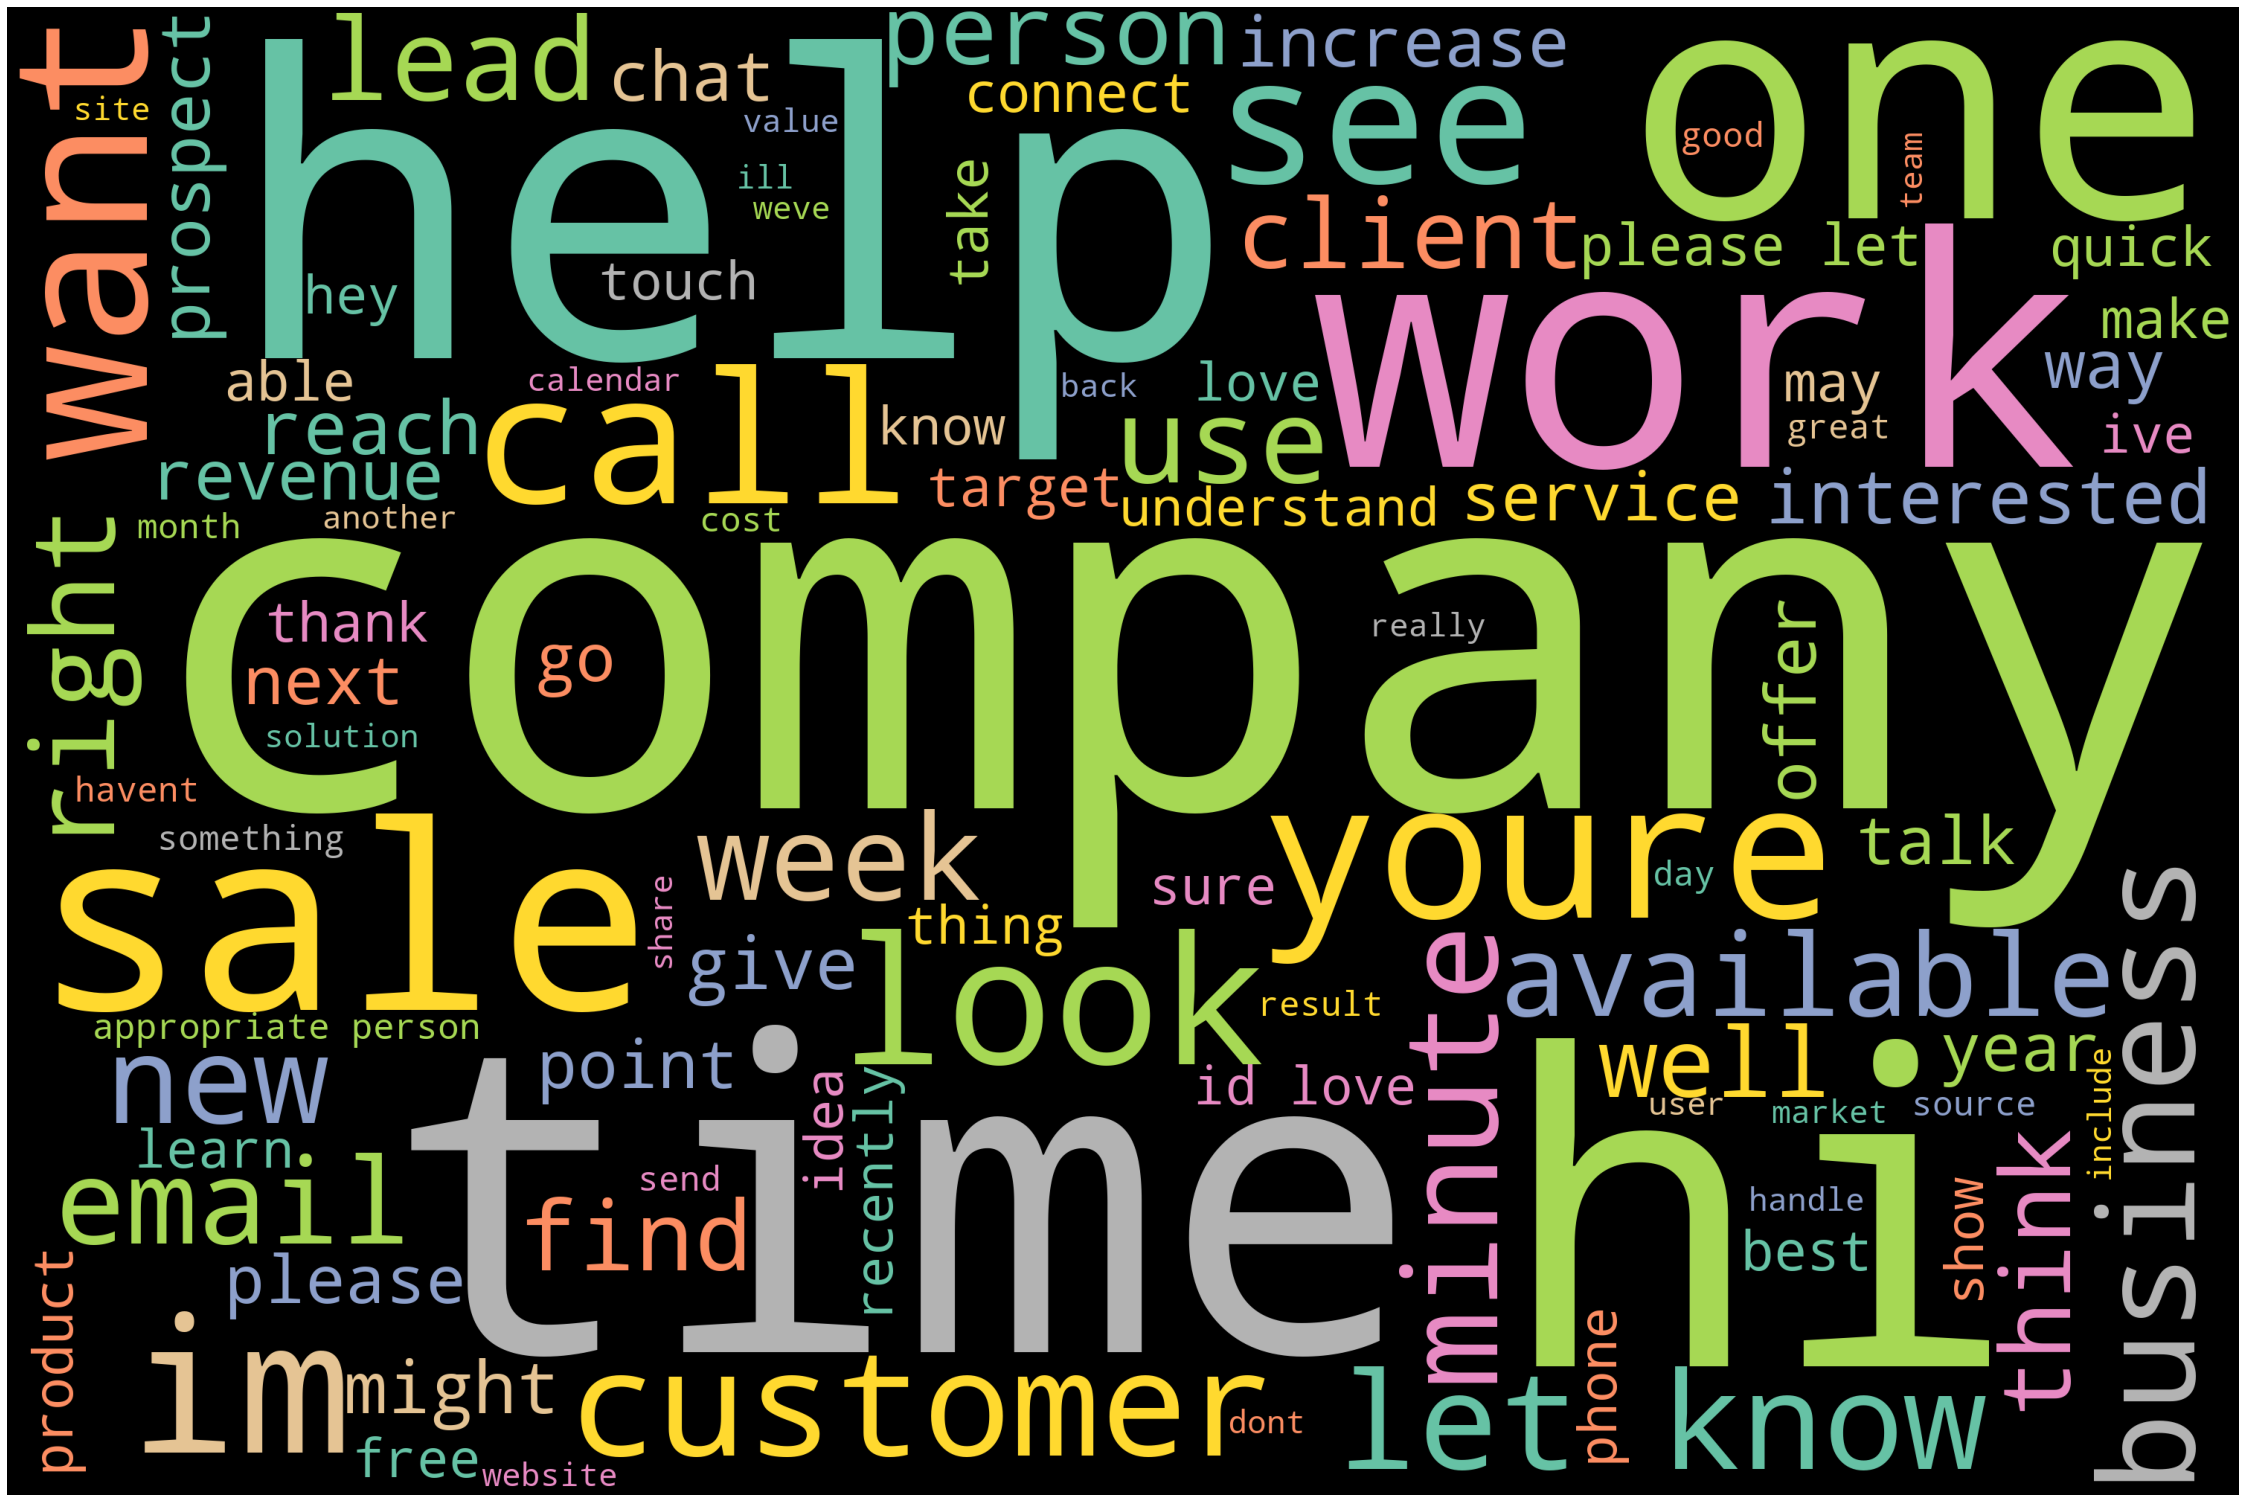

In [27]:
text = df['lemmatized_text'].values 

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2').generate(str(text))
plot_cloud(wordcloud)

# DEFINE A NEW DATADRAME

In [28]:
data = df[["Categories","lemmatized_text"]]
data.head()

Categories                                    lemmatized_text
0  Cold Email Templates  hi companywe help specific company type one li...
1  Cold Email Templates  hi mike nick im cofounder smart host help prop...
2  Cold Email Templates  id like discuss lead gen effort help company c...
3  Cold Email Templates  hi myname mycompany company make sale consiste...
4  Cold Email Templates  hi im try figure charge company would mind poi...

# NAMED ENTITY RECOGNITION

In [29]:
import spacy
nlp = spacy.load('en_core_web_sm')
text_nlp = nlp(no_punc_text)

In [30]:
# print named entities in article
ner_tagged = [(word.text, word.ent_type_) for word in text_nlp]
from spacy import displacy

# visualize named entities
displacy.render(text_nlp, style='ent', jupyter=True)

In [31]:
named_entities = []
temp_entity_name = ''
temp_named_entity = None
for term, tag in ner_tagged:
    if tag:
        temp_entity_name = ' '.join([temp_entity_name, term]).strip()
        temp_named_entity = (temp_entity_name, tag)
    else:
        if temp_named_entity:
            named_entities.append(temp_named_entity)
            temp_entity_name = ''
            temp_named_entity = None

In [32]:
print(named_entities)

[('one', 'CARDINAL'), ('mike', 'PERSON'), ('nick', 'PERSON'), ('tomorrow', 'DATE'), ('crm', 'PRODUCT'), ('revenue\xad', 'PRODUCT'), ('a few minutes', 'TIME'), ('tomorrow', 'DATE'), ('one', 'CARDINAL'), ('time options', 'ORG'), ('xyz', 'PERSON'), ('daytime this week', 'DATE'), ('minutes', 'TIME'), ('monthly', 'DATE'), ('every day', 'DATE'), ('the next few days', 'DATE'), ('everyday', 'DATE'), ('clv', 'PERSON'), ('kpis', 'ORG'), ('daytoday', 'DATE'), ('each month', 'DATE'), ('million spanish', 'NORP'), ('burger king pg', 'ORG'), ('chilis', 'GPE'), ('quinn xxxx kristy xxxx', 'PERSON'), ('rob xxxx', 'PERSON'), ('each month', 'DATE'), ('australians', 'NORP'), ('app', 'ORG'), ('the herald sun', 'ORG'), ('web analytics', 'ORG'), ('kissmetrics infographic', 'ORG'), ('marketo', 'ORG'), ('informatica yousendit', 'PERSON'), ('one', 'CARDINAL'), ('this week', 'DATE'), ('mondaytuesday', 'DATE'), ('next week', 'DATE'), ('mike maylon', 'PERSON'), ('twitter acquia', 'PERSON'), ('mike', 'PERSON'), ('ps

In [33]:
from collections import Counter
c = Counter([item[1] for item in named_entities])
c.most_common()

[('DATE', 76),
 ('CARDINAL', 26),
 ('PERSON', 20),
 ('ORG', 19),
 ('TIME', 12),
 ('ORDINAL', 6),
 ('GPE', 5),
 ('PRODUCT', 4),
 ('NORP', 2),
 ('PERCENT', 1)]

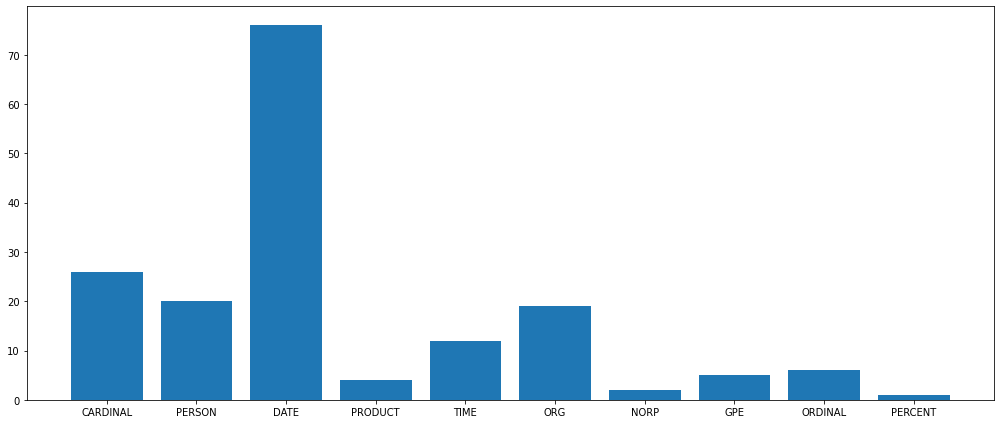

In [34]:
plt.rcParams["figure.figsize"] = [14, 6]
plt.rcParams["figure.autolayout"] = True
plt.bar(c.keys(), c.values())

plt.show()

# PART OF SPEECH

In [35]:
for token in text_nlp:
    print(token, token.pos_)

hi INTJ
name VERB
my DET
name NOUN
is AUX
name NOUN
with ADP
your DET
companywe NOUN
help NOUN
specific ADJ
company NOUN
type NOUN
with ADP
one NUM
liner NOUN
i PRON
wanted VERB
to PART
learn VERB
how ADV
you PRON
handlething VERB
your DET
company NOUN
handles NOUN
at ADP
company NOUN
name NOUN
and CCONJ
show VERB
you PRON
what PRON
were AUX
working VERB
onare VERB
you PRON
available ADJ
for ADP
a DET
brief ADJ
call NOUN
at ADP
time NOUN
options NOUN
hi INTJ
mike PROPN
my DET
name NOUN
is AUX
nick PROPN
and CCONJ
i PRON
m VERB
a DET
cofounder NOUN
at ADP
smart ADJ
host NOUN
we PRON
help VERB
property NOUN
managers NOUN
optimize VERB
their DET
pricing NOUN
on ADP
marketplaces NOUN
like SCONJ
homeaway ADJ
vrbo NOUN
and CCONJ
flipkey NOUN
i PRON
wanted VERB
to PART
learn VERB
how ADV
you PRON
currently ADV
handle VERB
price NOUN
optimization NOUN
and CCONJ
show VERB
you PRON
what PRON
were AUX
working VERB
on ADP
are AUX
you PRON
available ADJ
for ADP
a DET
quick ADJ
call NOUN
tomorrow NO

In [36]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in text_nlp if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:50])

['name', 'name', 'name', 'companywe', 'help', 'company', 'type', 'liner', 'wanted', 'learn', 'handlething', 'company', 'handles', 'company', 'name', 'show', 'working', 'onare', 'call', 'time', 'options', 'name', 'm', 'cofounder', 'host', 'help', 'property', 'managers', 'optimize', 'pricing', 'marketplaces', 'vrbo', 'flipkey', 'wanted', 'learn', 'handle', 'price', 'optimization', 'show', 'working', 'call', 'tomorrow', 'afternoon', 'name', 'd', 'like', 'discuss', 'lead', 'efforts', 'helping']


In [37]:
import nltk
nltk.download('averaged_perceptron_tagger')
pos_tags = nltk.pos_tag(text_tokens)
pd.DataFrame(pos_tags).T

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0     1     2     3    4     5     6     7          8     9     ...  \
0   hi  name    my  name   is  name  with  your  companywe  help  ...   
1   NN    NN  PRP$    NN  VBZ    JJ    IN  PRP$         NN    NN  ...   

        7807      7808    7809  7810   7811       7812 7813 7814  7815 7816  
0  available  tomorrow  insert  time  youre  available  can   we  sync   up  
1         JJ        NN      JJ    NN     NN         JJ   MD  PRP    VB   RP  

[2 rows x 7817 columns]

In [38]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = data['lemmatized_text'].apply(lambda x: check_pos_tag(x, 'pron'))

In [39]:
df.head()

Categories                                            Context  \
0  Cold Email Templates  hi name my name is name with your companywe he...   
1  Cold Email Templates  hi mike my name is nick and im a cofounder at ...   
2  Cold Email Templates  name id like to discuss your lead gen efforts ...   
3  Cold Email Templates  hi name myname from mycompany here companies m...   
4  Cold Email Templates  hi name im trying to figure out who is in char...   

                           Context_without_stopwords  \
0  hi companywe help specific company type one li...   
1  hi mike nick im cofounder smart host help prop...   
2  id like discuss lead gen efforts helping compa...   
3  hi myname mycompany companies make sales consi...   
4  hi im trying figure charge company would mind ...   

                                     lemmatized_text  noun_count  verb_count  \
0  hi companywe help specific company type one li...           0           0   
1  hi mike nick im cofounder smart host help prop...           0           0   
2  id like discuss lead gen effort help company c...           0           0   
3  hi myname mycompany company make sale consiste...           0           0   
4  hi im try figure charge company would mind poi...           0           0   

   adj_count  adv_count  pron_count  
0          0          0           0  
1          0          0           0  
2          0          0           0  
3          0          0           0  
4          0          0           0

# BIGRAM ANALYSIS

In [40]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [41]:
top2_words = get_top_n2_words(df['lemmatized_text'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

Bi-gram  Freq
0            let know    24
1          please let    12
2  appropriate person    12
3             id love    10
4           get touch     8

In [42]:
#BIGRAM VISUALIZATION

[Text(0, 0, 'let know'),
 Text(1, 0, 'please let'),
 Text(2, 0, 'appropriate person'),
 Text(3, 0, 'id love'),
 Text(4, 0, 'get touch'),
 Text(5, 0, 'make sense'),
 Text(6, 0, 'calendar look'),
 Text(7, 0, 'would like'),
 Text(8, 0, 'blog post'),
 Text(9, 0, 'look like'),
 Text(10, 0, 'best way'),
 Text(11, 0, 'best person'),
 Text(12, 0, 'person handle'),
 Text(13, 0, 'person speak'),
 Text(14, 0, 'customer success'),
 Text(15, 0, 'havent heard'),
 Text(16, 0, 'heard back'),
 Text(17, 0, 'havent time'),
 Text(18, 0, 'time respond'),
 Text(19, 0, 'id happy')]

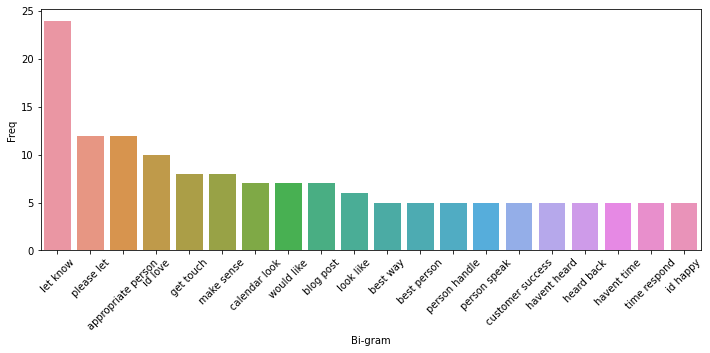

In [43]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [44]:
#TRIGRAM ANALYSIS

In [45]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [46]:
top3_words = get_top_n3_words(df['lemmatized_text'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [47]:
top3_df.head()

Tri-gram  Freq
0    please let know    11
1    might get touch     4
2  could please help     4
3  please help point     4
4    make sense talk     4

In [48]:
#TRIGRAM ANALYSIS

[Text(0, 0, 'please let know'),
 Text(1, 0, 'might get touch'),
 Text(2, 0, 'could please help'),
 Text(3, 0, 'please help point'),
 Text(4, 0, 'make sense talk'),
 Text(5, 0, 'sense talk let'),
 Text(6, 0, 'talk let know'),
 Text(7, 0, 'let know calendar'),
 Text(8, 0, 'know calendar look'),
 Text(9, 0, 'look appropriate person'),
 Text(10, 0, 'havent heard back'),
 Text(11, 0, 'havent time respond'),
 Text(12, 0, 'tomorrow insert time'),
 Text(13, 0, 'insert time youre'),
 Text(14, 0, 'time youre available'),
 Text(15, 0, 'research company determine'),
 Text(16, 0, 'company determine need'),
 Text(17, 0, 'determine need could'),
 Text(18, 0, 'need could please'),
 Text(19, 0, 'help point best')]

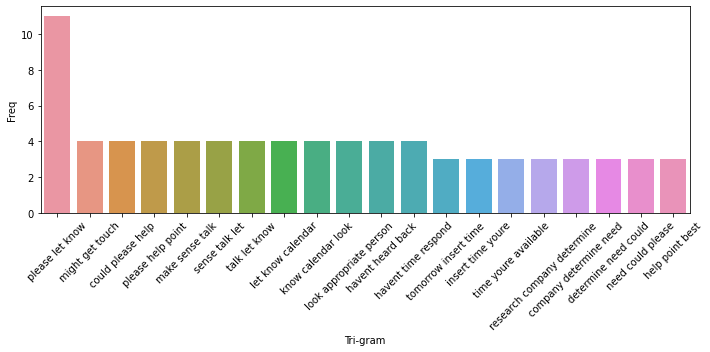

In [49]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# MODEL BUILDING

In [50]:
data['category_id'] = data['Categories'].factorize()[0]
from io import StringIO
category_id_df = data[['Categories', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Categories']].values)

# VISUALIZATION OF NUMBER OF MAILS FOR EACH TEMPLATE

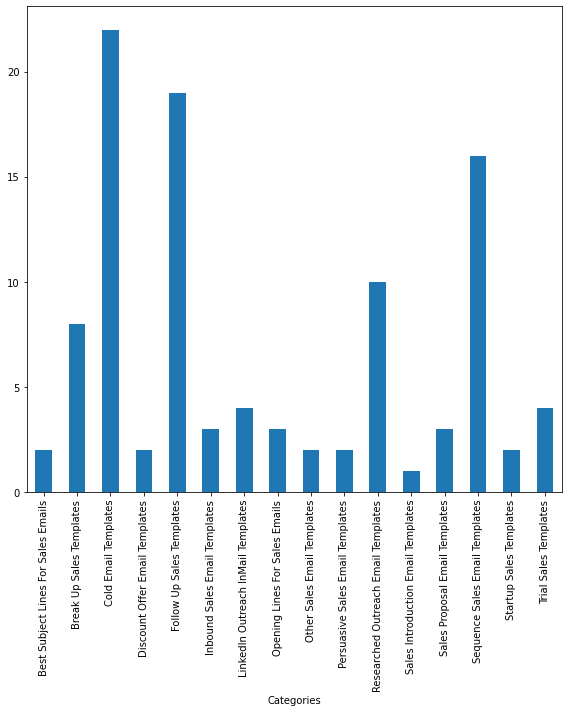

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,10))
data.groupby('Categories').lemmatized_text.count().plot.bar(ylim=0)
plt.show()

# TF-IDF

In [52]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(data.lemmatized_text).toarray()
labels = data.category_id
features.shape

(103, 161)

In [53]:
# PERFORMING AND VISUALIZE NGRAM ANALYSIS ON EACH TEMPLATE

In [54]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for EMAIL_TEMPLATES, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
  print("# '{}':".format(EMAIL_TEMPLATES))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
  print("  . Most correlated trigrams:\n       . {}".format('\n       . '.join(trigrams[-N:])))

# 'Best Subject Lines For Sales Emails':
  . Most correlated unigrams:
       . post
       . saw
  . Most correlated bigrams:
       . let know
       . appropriate person
  . Most correlated trigrams:
       . 
# 'Break Up Sales Templates':
  . Most correlated unigrams:
       . interested
       . havent
  . Most correlated bigrams:
       . youre interested
       . havent heard
  . Most correlated trigrams:
       . 
# 'Cold Email Templates':
  . Most correlated unigrams:
       . handle
       . brief
  . Most correlated bigrams:
       . person speak
       . reach time
  . Most correlated trigrams:
       . 
# 'Discount Offer Email Templates':
  . Most correlated unigrams:
       . ill
       . reply
  . Most correlated bigrams:
       . id love
       . id happy
  . Most correlated trigrams:
       . 
# 'Follow Up Sales Templates':
  . Most correlated unigrams:
       . phone
       . send
  . Most correlated bigrams:
       . reach time
       . make sense
  . Most correlated

# SPLIT THE DATA INTO TRAIN AND TEST

# FIT WITH CountVectorizer and TfidfTransformer

In [55]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(data['lemmatized_text'], data['Categories'],test_size=0.26, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_counts = count_vect.fit_transform(X_test)
tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)

In [56]:
X_train.shape

(76,)

In [57]:
X_test.shape

(27,)

In [58]:
X_train_tfidf.shape

(76, 1076)

In [59]:
X_test_tfidf.shape

(27, 476)

# USING MULTIPLE MODEL TO FIND WHICH IS BEST

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
# conda install -c conda-forge xgboost
from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [61]:
X1=data['lemmatized_text']
Y1=data['Categories']
x = data['lemmatized_text']
y = data['Categories']
vect = CountVectorizer()

In [62]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.05,random_state=42)
x_train_dtm = vect.fit_transform(x_train1)
x_test_dtm = vect.transform(x_test1)

# NAIVE BAYES

In [63]:
NB = MultinomialNB()
NB.fit(x_train_dtm,y_train1)
y_predict = NB.predict(x_test_dtm)
NB_acc = metrics.accuracy_score(y_test1,y_predict)
NB_acc

0.5

# SGDClassifier

In [64]:
from sklearn.linear_model import LinearRegression 
lm = SGDClassifier()
lm.fit(x_train_dtm,y_train1)
lm_predict = lm.predict(x_test_dtm)
SGD_acc= metrics.accuracy_score(y_test1,lm_predict)
SGD_acc

0.16666666666666666

# RandomForestClassifier

In [65]:

rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train1)
rf_predict = rf.predict(x_test_dtm)
Random_acc = metrics.accuracy_score(y_test1,rf_predict)
Random_acc

0.0

# XGBClassifier

In [66]:
xg = XGBClassifier()
xg.fit(x_train_dtm,y_train1)
xg_predict = xg.predict(x_test_dtm)
xg_acc = metrics.accuracy_score(y_test1,xg_predict)
xg_acc

[12:04:39] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.3333333333333333

# PassiveAggressiveClassifier

In [67]:
pg = PassiveAggressiveClassifier()
pg.fit(x_train_dtm,y_train1)
pg_predict = pg.predict(x_test_dtm)
pg_acc = metrics.accuracy_score(y_test1,pg_predict)
pg_acc

0.3333333333333333

# LinearSVC

In [68]:
lv = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', tol=0.0001,
     verbose=0)
lv.fit(x_train_dtm,y_train1)
lv_predict = lv.predict(x_test_dtm)
lv_acc= metrics.accuracy_score(y_test1,lv_predict)
lv_acc

0.5

In [69]:
data = {'Model':['MultinomialNB','SGDClassifier','RandomForestClassifier','XGBClassifier', 'PassiveAggressiveClassifier','LinearSVC'],'Accuracy':[NB_acc, SGD_acc,Random_acc,xg_acc,pg_acc,lv_acc]}

# ACCURACY SCORE OF EACH MODEL

In [70]:
data_model = pd.DataFrame(data)
data_model.sort_values(by=['Accuracy'], ascending=False)

Model  Accuracy
0                MultinomialNB  0.500000
5                    LinearSVC  0.500000
3                XGBClassifier  0.333333
4  PassiveAggressiveClassifier  0.333333
1                SGDClassifier  0.166667
2       RandomForestClassifier  0.000000

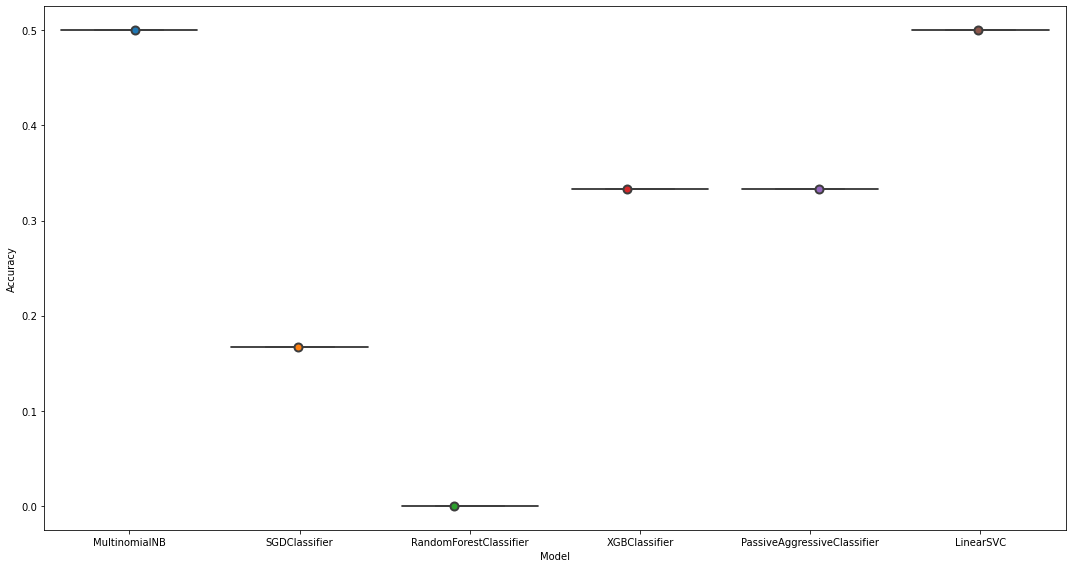

In [71]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.boxplot(x='Model', y='Accuracy', data=data_model)
sns.stripplot(x='Model', y='Accuracy', data=data_model, 
              size=8, jitter=True, edgecolor="gray", linewidth=2,)
plt.show()

# APPROACH 2

In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import string
import gensim
import operator
import re

In [73]:
TEMP.head()

Categories                                            Subject  \
0  Cold Email Templates                    {Company Name} + {Your Company}   
1  Cold Email Templates                        {Company Name} + Smart Host   
2  Cold Email Templates  How to Export [company] Prospects from profess...   
3  Cold Email Templates  How to Export [company] Prospects from profess...   
4  Cold Email Templates  How to Export [company] Prospects from profess...   

                                             Context  
0  Hi {name}, My name is {name} with {Your Compan...  
1  Hi Mike, My name is Nick and I’m a co-founder ...  
2  {name}, I'd like to discuss your lead gen effo...  
3  Hi {name}, {myName} from {myCompany} here. Com...  
4  Hi {name}, I’m trying to figure out who is in ...

In [74]:
# Data Cleaning and Pre-processing

In [75]:
from spacy.lang.en.stop_words import STOP_WORDS

spacy_nlp = spacy.load('en_core_web_sm')

#create list of punctuations and stopwords
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

#function for data cleaning and processing
#This can be further enhanced by adding / removing reg-exps as desired.

def spacy_tokenizer(sentence):
 
    #remove distracting single quotes
    sentence = re.sub('\'','',sentence)

    #remove digits adnd words containing digits
    sentence = re.sub('\w*\d\w*','',sentence)

    #replace extra spaces with single space
    sentence = re.sub(' +',' ',sentence)

    #remove unwanted lines starting from special charcters
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)
    
    #remove non-breaking new line characters
    sentence = re.sub(r'\n',' ',sentence)
    
    #remove punctunations
    sentence = re.sub(r'[^\w\s]',' ',sentence)
    
    #creating token object
    tokens = spacy_nlp(sentence)
    
    #lower, strip and lemmatize
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
    
    #remove stopwords, and exclude words less than 2 characters
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]
    
    #return tokens
    return tokens

In [76]:
print ('Cleaning and Tokenizing...')
%time TEMP['Context_tokenized'] = TEMP['Context'].map(lambda x: spacy_tokenizer(x))
TEMP.head()

Cleaning and Tokenizing...
Wall time: 5.35 s


Categories                                            Subject  \
0  Cold Email Templates                    {Company Name} + {Your Company}   
1  Cold Email Templates                        {Company Name} + Smart Host   
2  Cold Email Templates  How to Export [company] Prospects from profess...   
3  Cold Email Templates  How to Export [company] Prospects from profess...   
4  Cold Email Templates  How to Export [company] Prospects from profess...   

                                             Context  \
0  Hi {name}, My name is {name} with {Your Compan...   
1  Hi Mike, My name is Nick and I’m a co-founder ...   
2  {name}, I'd like to discuss your lead gen effo...   
3  Hi {name}, {myName} from {myCompany} here. Com...   
4  Hi {name}, I’m trying to figure out who is in ...   

                                   Context_tokenized  
0  [company, help, specific, company, type, liner...  
1  [mike, nick, founder, smart, host, help, prope...  
2  [like, discuss, lead, gen, effort, help, indus...  
3  [myname, mycompany, company, sale, consistent,...  
4  [try, figure, charge, lead, general, statement...

In [77]:
TEMPS_plot = TEMP['Context_tokenized']
TEMPS_plot[0:5]

0    [company, help, specific, company, type, liner...
1    [mike, nick, founder, smart, host, help, prope...
2    [like, discuss, lead, gen, effort, help, indus...
3    [myname, mycompany, company, sale, consistent,...
4    [try, figure, charge, lead, general, statement...
Name: Context_tokenized, dtype: object

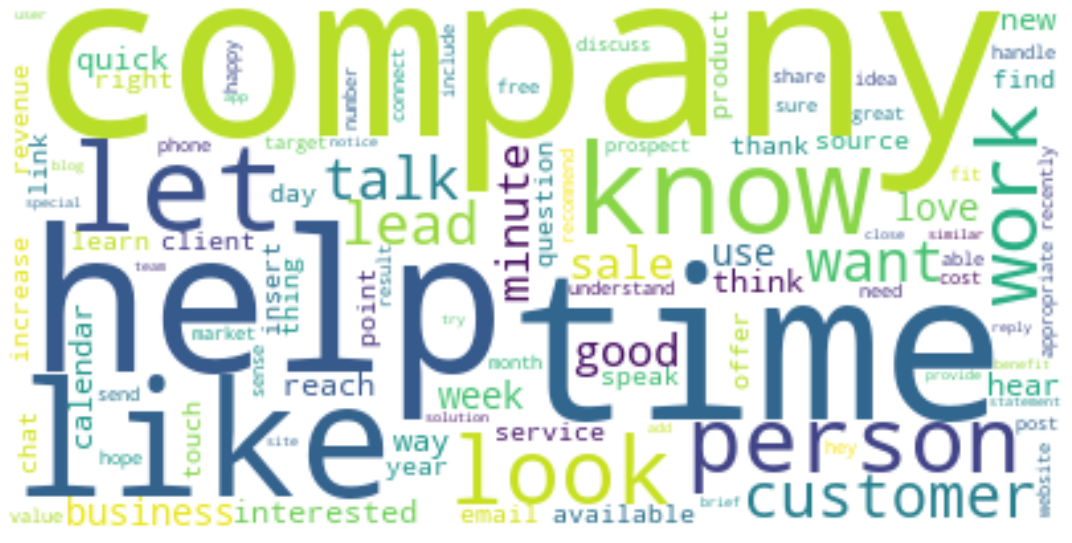

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(TEMPS_plot)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [79]:
#Building Word Dictionary¶

Creating Dictionaries using In-Memory Objects It is super easy to create dictionaries that map words to IDs using Pythons Gensim library. we first import the gensim library along with the corpora module from the library. We are now ready to create our dictionary. To do so, we can use the Dictionary object of the corpora module and pass it the list of tokens. Finally, to print the contents of the newly created dictionary, we can use the token2id object of the Dictionary class

In [80]:
from gensim import corpora

#creating term dictionary
%time dictionary = corpora.Dictionary(TEMPS_plot)

#filter out terms which occurs in less than 4 documents and more than 20% of the documents.
#NOTE: Since we have smaller dataset, we will keep this commented for now.

#dictionary.filter_extremes(no_below=4, no_above=0.2)

#list of few which which can be further removed
stoplist = set('hello and if this can would should could tell ask stop come go')
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)

Wall time: 31.2 ms


Token2id assigns numeric ID to unique words in our text.The word or token is the key of the dictionary and the ID is the value.

In [81]:
#print top 50 items from the dictionary with their unique token-id
dict_tokens = [[[dictionary[key], dictionary.token2id[dictionary[key]]] for key, value in dictionary.items() if key <= 50]]
print (dict_tokens)

[[['available', 0], ['brief', 1], ['company', 2], ['handle', 3], ['help', 4], ['learn', 5], ['liner', 6], ['option', 7], ['specific', 8], ['thing', 9], ['time', 10], ['type', 11], ['want', 12], ['work', 13], ['afternoon', 14], ['currently', 15], ['flipkey', 16], ['founder', 17], ['homeaway', 18], ['host', 19], ['like', 20], ['manager', 21], ['marketplace', 22], ['mike', 23], ['nick', 24], ['optimization', 25], ['optimize', 26], ['price', 27], ['pricing', 28], ['property', 29], ['quick', 30], ['smart', 31], ['tomorrow', 32], ['vrbo', 33], ['add', 34], ['address', 35], ['collect', 36], ['crm', 37], ['directly', 38], ['discuss', 39], ['effort', 40], ['email', 41], ['gen', 42], ['generate', 43], ['import', 44], ['industry', 45], ['lead', 46], ['network', 47], ['new', 48], ['number', 49], ['phone', 50]]]


Dictionaries contain mappings between words and their corresponding numeric values. Bag of words corpora in the Gensim library are based on dictionaries and contain the ID of each word along with the frequency of occurrence of the word.

In [82]:
#Feature Extraction (Bag of Words)

# BOW

The Dictionary object contains doc2bow method which basically performs 2 tasks : (1)It iterates through all the words in the text, if the word already exists in the corpus, it increments the frequency count for the word . (2)Otherwise it inserts the word into the corpus and sets its frequency count to 1 .


In [83]:
corpus = [dictionary.doc2bow(desc) for desc in TEMPS_plot]

word_frequencies = [[(dictionary[id], frequency) for id, frequency in line] for line in corpus[0:3]]

print(word_frequencies)

[[('available', 1), ('brief', 1), ('company', 4), ('handle', 2), ('help', 1), ('learn', 1), ('liner', 1), ('option', 1), ('specific', 1), ('thing', 1), ('time', 1), ('type', 1), ('want', 1), ('work', 1)], [('available', 1), ('handle', 1), ('help', 1), ('learn', 1), ('want', 1), ('work', 1), ('afternoon', 1), ('currently', 1), ('flipkey', 1), ('founder', 1), ('homeaway', 1), ('host', 1), ('like', 1), ('manager', 1), ('marketplace', 1), ('mike', 1), ('nick', 1), ('optimization', 1), ('optimize', 1), ('price', 1), ('pricing', 1), ('property', 1), ('quick', 1), ('smart', 1), ('tomorrow', 1), ('vrbo', 1)], [('company', 2), ('help', 1), ('like', 1), ('quick', 1), ('add', 1), ('address', 1), ('collect', 1), ('crm', 1), ('directly', 1), ('discuss', 1), ('effort', 1), ('email', 1), ('gen', 1), ('generate', 1), ('import', 1), ('industry', 1), ('lead', 1), ('network', 1), ('new', 1), ('number', 1), ('phone', 1), ('professional', 1), ('prospect', 1), ('prospecting', 1), ('question', 1), ('responsi

The first tuple ('available', 1) basically means that the word 'available' occurred 1 time in the text. Similarly, ('company', 4) means that the word with 'company' occurred 4 times in the document.

The bag of words approach works fine for converting text to numbers. However, it has one drawback. It assigns a score to a word based on its occurrence in a particular document. It doesn't take into account the fact that the word might also have a high frequency of occurrences in other documents as well. TF-IDF resolves this issue.

In [84]:
# Term frequency = (Frequency of the word in a document)/(Total words in the document)
# IDF(word) = Log((Total number of documents)/(Number of documents containing the word))
# Using the Gensim library, we can easily create a TF-IDF corpus:

# TF-IDF

Some words might not be stopwords but may occur more often in the documents and may be of less importance. Hence these words need to be removed or down-weighted in importance. The TFIDF model takes the text that share a common language and ensures that most common words across the entire corpus don’t show as keywords.

To find the TF-IDF value, we can use the TfidfModel class from the models module of the Gensim library. We simply have to pass the bag of word corpus as a parameter to the constructor of the TfidfModel class. In the output, you will see all of the words in the three sentences, along with their TF-IDF values:

Latent Semantic Indexing, LSI (or sometimes LSA) transforms documents from either bag-of-words or (preferrably) TfIdf-weighted space into a latent space of a lower dimensionality. Here we transformed our Tf-Idf corpus via Latent Semantic Indexing into a latent 300-D space (300-D because we set num_topics=300) and num_topics is usally choosen between 200-500)

In [85]:
# Build Tf-Idf and LSI Model 

In [86]:
%time TEMPS_tfidf_model = gensim.models.TfidfModel(corpus, id2word=dictionary)
%time TEMPS_lsi_model = gensim.models.LsiModel(TEMPS_tfidf_model[corpus], id2word=dictionary, num_topics=300)

Wall time: 31.2 ms
Wall time: 2.32 s


In [87]:
tfidf = gensim.models.tfidfmodel.TfidfModel(corpus,id2word=dictionary)
corpus_tfidf = tfidf[corpus]
d = {}
for doc in corpus_tfidf:
    for id, value in doc:
        word = dictionary.get(id)
        d[word] = value
        print(doc)

[(0, 0.20391960225143885), (1, 0.2696674991050689), (2, 0.31418222424085146), (3, 0.4624148898888256), (4, 0.08971776752789497), (5, 0.20391960225143885), (6, 0.3081275532657249), (7, 0.3738754501193549), (8, 0.286961458088785), (9, 0.2121729937386336), (10, 0.09211926705728263), (11, 0.3354153959586989), (12, 0.14220866207514365), (13, 0.14220866207514365)]
[(0, 0.20391960225143885), (1, 0.2696674991050689), (2, 0.31418222424085146), (3, 0.4624148898888256), (4, 0.08971776752789497), (5, 0.20391960225143885), (6, 0.3081275532657249), (7, 0.3738754501193549), (8, 0.286961458088785), (9, 0.2121729937386336), (10, 0.09211926705728263), (11, 0.3354153959586989), (12, 0.14220866207514365), (13, 0.14220866207514365)]
[(0, 0.20391960225143885), (1, 0.2696674991050689), (2, 0.31418222424085146), (3, 0.4624148898888256), (4, 0.08971776752789497), (5, 0.20391960225143885), (6, 0.3081275532657249), (7, 0.3738754501193549), (8, 0.286961458088785), (9, 0.2121729937386336), (10, 0.09211926705728263

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [88]:
%time gensim.corpora.MmCorpus.serialize('TEMPS_tfidf_model_mm', TEMPS_tfidf_model[corpus])
%time gensim.corpora.MmCorpus.serialize('TEMPS_lsi_model_mm',TEMPS_lsi_model[TEMPS_tfidf_model[corpus]])

Wall time: 109 ms
Wall time: 176 ms


In [89]:
#Load the indexed corpus
TEMPS_tfidf_corpus = gensim.corpora.MmCorpus('TEMPS_tfidf_model_mm')
TEMPS_lsi_corpus = gensim.corpora.MmCorpus('TEMPS_lsi_model_mm') 

print(TEMPS_tfidf_corpus)
print(TEMPS_lsi_corpus)


MmCorpus(103 documents, 1092 features, 2954 non-zero entries)
MmCorpus(103 documents, 98 features, 10094 non-zero entries)


In [90]:
from gensim.similarities import MatrixSimilarity

%time TEMPS_index = MatrixSimilarity(TEMPS_lsi_corpus, num_features = TEMPS_lsi_corpus.num_terms)

Wall time: 96 ms


In [91]:
corpus_lsi = TEMPS_lsi_model[corpus_tfidf]

In [92]:
TEMPS_lsi_model.print_topics(98)

[(0,
  '0.197*"person" + 0.177*"company" + 0.177*"point" + 0.149*"handle" + 0.148*"statement" + 0.141*"time" + 0.140*"look" + 0.139*"insert" + 0.129*"know" + 0.129*"appropriate"'),
 (1,
  '-0.356*"point" + 0.239*"respond" + 0.230*"interested" + -0.230*"handle" + -0.222*"pain" + -0.209*"insert" + -0.196*"brief" + -0.177*"research" + -0.162*"discussion" + -0.158*"strong"'),
 (2,
  '-0.354*"statement" + -0.216*"appropriate" + -0.212*"person" + -0.182*"mutual" + -0.173*"expertise" + -0.169*"sense" + -0.161*"try" + -0.153*"manage" + -0.136*"fit" + 0.134*"available"'),
 (3,
  '-0.304*"respond" + -0.224*"interested" + -0.192*"handle" + 0.190*"appropriate" + -0.178*"thing" + -0.174*"point" + -0.166*"chase" + -0.161*"brief" + -0.155*"worry" + -0.155*"whichever"'),
 (4,
  '-0.218*"prospect" + -0.217*"touch" + -0.178*"reason" + 0.177*"appropriate" + -0.174*"number" + -0.167*"lead" + -0.133*"phone" + -0.123*"mind" + -0.123*"general" + -0.123*"charge"'),
 (5,
  '-0.225*"reason" + -0.205*"increase" 

In [93]:
for doc in corpus_lsi: # both bow->tfidf and tfidf->lsi transformations are actually executed here, on the fly
    print(doc)

[(0, 0.33239679963173924), (1, -0.2841584759429791), (2, 0.25469311634315184), (3, -0.34405643221808446), (4, 0.17270706017944834), (5, -0.13957145914225813), (6, 0.4683784094779857), (7, -0.08907272210449232), (8, 0.042450570614508736), (9, -0.4626477892959852), (10, 0.2077168643891754), (11, -0.00822649237140362), (12, 0.03591721885389062), (13, -0.006891475263498445), (14, 0.06942793971827554), (15, -0.09670568795321716), (16, 0.044566791942173056), (17, -0.09515914045675844), (18, 0.060552367591505396), (19, -0.02517842485598229), (20, 0.02985983676638514), (21, 0.004745738762320417), (22, 0.006936681635212083), (23, -0.02027423723076844), (24, 0.061491133885158505), (25, 0.0008320119749501719), (26, 0.028296858982068254), (27, 0.04522772522883477), (28, -0.04075995971885673), (29, 0.04661704750191407), (30, 0.030504493298193793), (31, 0.01470579516799155), (32, 0.016192856311889887), (33, -0.025222564070067528), (34, -0.049176565351554895), (35, 0.062042590789054705), (36, 0.01140

# TIME FOR SEMANTIC SEARCH

In [94]:
from operator import itemgetter

def search_similar_TEMP(search_term):

    query_bow = dictionary.doc2bow(spacy_tokenizer(search_term))
    query_tfidf = TEMPS_tfidf_model[query_bow]
    query_lsi = TEMPS_lsi_model[query_tfidf]

    TEMPS_index.num_best = 1

    TEMP_list = TEMPS_index[query_lsi]

    TEMP_list.sort(key=itemgetter(1), reverse=True)
    TEMPS_names = []

    for j, TEMPS in enumerate(TEMP_list):

        TEMPS_names.append (
            {
                'Accuracy': round((TEMPS[1] * 100),3),
                'email template Title': TEMP['Categories'][TEMPS[0]],
                'template Subject': TEMP['Subject'][TEMPS[0]],
                'template Context': TEMP['Context'][TEMPS[0]]
            
            }

        )
        if j == (TEMPS_index.num_best-1):
            break
    pd.set_option('display.max_colwidth', -1)
    return pd.DataFrame(TEMPS_names, columns=['template Context','email template Title','template Subject','Accuracy'])

In [96]:
# search for movie tiles that are related to below search parameters
search_similar_TEMP(' researched outreach email template')

template Context  \
0  {name}, I am doing some research on your company to determine if there is (or is not) a need for [insert your strongest pain point]. Could you please help me by pointing me to the best person there for a brief discussion? {name}, I am doing some research on your company to determine if there is (or is not) a need for [insert your strongest pain point]. Could you please help me by pointing me to the best person there for a brief discussion?   

   email template Title  \
0  Cold Email Templates   

                                                       template Subject  \
0  Looking for best [insert job area where you’d like to start] contact   

   Accuracy  
0  79.851

# Reference links
https://www.analyticsvidhya.com/blog/2021/06/part-16-step-by-step-guide-to-master-nlp-topic-modelling-using-lsa/
https://stackabuse.com/python-for-nlp-working-with-the-gensim-library-part-1/
https://www.geeksforgeeks.org/nlp-gensim-tutorial-complete-guide-for-beginners/
https://towardsdatascience.com/latent-semantic-analysis-deduce-the-hidden-topic-from-the-document-f360e8c0614b